In [2]:
import os
import pyarrow.parquet as pq

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Data with demographic related fields

In [ ]:
demo_feat=['desired_outcome','maid',
               'DEM200001','DEM200002','DEM200003','DEM200004','DEM200005','DEM200006','DEM200007',
               'DEM200008','DEM200009','DEM200014','DEM200010','DEM200011','DEM200012','DEM200013',
               'DEM003045','DEM003046','DEM003314','DEM003316','DEM003048','DEM003312','DEM003342',
               'DEM003320','DEM003345','DEM003311','DEM003310','DEM003049','DEM003344','DEM003343']

def demo_data_extract(save_path):
    first=1
    files=os.listdir(save_path)
    for filename in files:

        if filename.endswith(".parquet"): 
            path=save_path+filename
            if first==1:
                demo_tb=pq.read_table(path)
                demo_tb=demo_tb.select([c for c in demo_tb.to_pandas().columns if c in demo_feat]).to_pandas()
                first=0
            else:
                new=pq.read_table(path).select([c for c in demo_tb.columns if c in demo_feat]).to_pandas()
                demo_tb=demo_tb.append(new)
    return demo_tb


In [ ]:
demo_tb=demo_data_extract('/Users/pushin/Desktop/td_dataset')
demo_tb.to_csv('demo_data.csv')

# EDA - demographic

In [3]:
demo_data=pd.read_csv('demo_data.csv')

In [5]:
# setting
age=[('DEM'+str(field)) for field in range(200001,200015)]+['desired_outcome']
gender=['DEM003045','DEM003046','desired_outcome']
language=list(demo_data.columns.difference(age).difference(gender).difference(['maid','Unnamed: 0']))+['desired_outcome']
gen_map={'DEM003045':'Female','DEM003046':'Male'}
lan_map={'DEM003314':'Arabic','DEM003316':'Chinese','DEM003048':'English','DEM003312':'French',
        'DEM003342':'Indonesian','DEM003320':'Korean','DEM003345':'Persian','DEM003311':'Portuguese',
         'DEM003310':'Russian','DEM003049':'Spanish','DEM003344':'Thai','DEM003343':'Turkish'}
age_map={'DEM200001':'13-17','DEM200002':'18-20','DEM200003':'21-24','DEM200004':'25-29','DEM200005':'30-34',
         'DEM200006':'35-39','DEM200007':'40-44','DEM200008':'45-49','DEM200009':'50-54','DEM200014':'55-59',
         'DEM200010':'60-64','DEM200011':'65-69','DEM200012':'70-75','DEM200013':'76+'}

In [6]:
tot_no_install = len(demo_data[demo_data['desired_outcome']==0])
tot_install = len(demo_data[demo_data['desired_outcome']==1])

def EDA_tb(col_ls,col_map):
    tb=demo_data.loc[:,col_ls].groupby('desired_outcome').sum().T
    tb.rename(columns={0:'no_install',1:'install'},inplace=True)
    tb['install_perc']=tb['install']/(tb['no_install']+tb['install'])
    tb=tb.reset_index()
    tb['meaning']=tb['index'].map(col_map)
    tb.sort_values('install_perc',ascending=False,inplace=True)
    return tb

Text(0, 0.5, 'Install percentage')

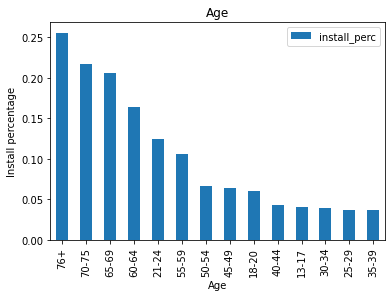

In [7]:
age_tb=EDA_tb(age,age_map)
fig = age_tb.plot(x='meaning',y='install_perc',kind='bar')
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('Install percentage')

Text(0, 0.5, 'Install percentage')

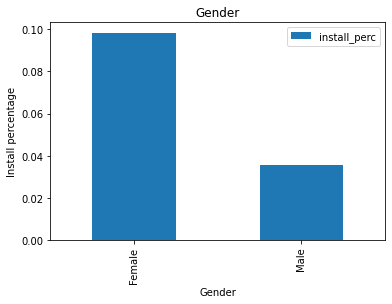

In [8]:
gen_tb=EDA_tb(gender,gen_map)
fig = gen_tb.plot(x='meaning',y='install_perc',kind='bar')
fig.set_title('Gender')
fig.set_xlabel('Gender')
fig.set_ylabel('Install percentage')

Text(0, 0.5, 'Install percentage')

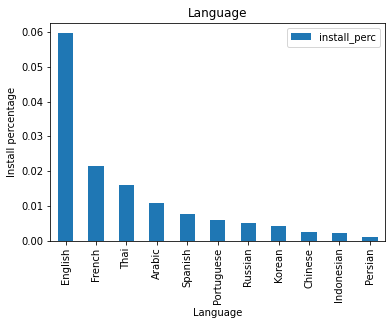

In [9]:
lan_tb=EDA_tb(language,lan_map)
fig = lan_tb.plot(x='meaning',y='install_perc',kind='bar')
fig.set_title('Language')
fig.set_xlabel('Language')
fig.set_ylabel('Install percentage')